In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv
import os
import sys
import os
import tensorflow as tf
from utils import DKT
from load_data import DKTData
import tensorflow.compat.v1 as tf

In [36]:
train_path = '/home/fast/Desktop/Assessment_1/GKT/data/train.csv'
test_path = '/home/fast/Desktop/Assessment_1/GKT/data/test.csv'
save_dir_prefix = './dkt_models/assesstment/'

In [39]:
rnn_cells = {
    "LSTM": tf.compat.v1.nn.rnn_cell.LSTMCell,
    #"GRU": tf.contrib.rnn.GRUCell,
    #"BasicRNN": tf.contrib.rnn.BasicRNNCell,
    #"LayerNormBasicLSTM": tf.contrib.rnn.LayerNormBasicLSTMCell,
}

# train_path = os.path.join('./data/', 'skill_id_train.csv')
# test_path = os.path.join('./data/', 'skill_id_test.csv')

network_config = {}
network_config['batch_size'] = 64
network_config['hidden_layer_structure'] = [200]
network_config['learning_rate'] = 0.001
network_config['keep_prob'] = 0.5
network_config['rnn_cell'] = rnn_cells["LSTM"]


use_dktp = True

if use_dktp:
    network_config['lambda_o'] = 0.15
    network_config['lambda_w1'] = 0.3
    network_config['lambda_w2'] = 3.0
else:
    network_config['lambda_o'] = 0.0
    network_config['lambda_w1'] = 0.0
    network_config['lambda_w2'] = 0.0


num_runs = 1
num_epochs = 8
batch_size = 64
keep_prob = 0.5

In [ ]:
sess = tf.compat.v1.Session()

data = DKTData(train_path, test_path, batch_size=batch_size)
data_train = data.train
data_test = data.test
num_problems = data.num_problems

dkt = DKT(sess, data_train, data_test, num_problems, network_config,
          num_runs=num_runs, num_epochs=num_epochs,
          save_dir_prefix=save_dir_prefix,
          keep_prob=keep_prob, logging=False, save=False)


# load the model
dkt.model.build_graph()
#dkt.load_model()
#dkt.save_model()
dkt.run_optimization()

Reading /home/fast/Desktop/Assessment_1/GKT/data/train.csv
9960 lines was read
max_num_problems_answered: 6157
num_problems: 110
The number of students is 3086
Finish reading data.
Reading /home/fast/Desktop/Assessment_1/GKT/data/test.csv
2493 lines was read
max_num_problems_answered: 3263
num_problems: 110
The number of students is 776
Finish reading data.
ckpt_save_dir:  ./dkt_models/assesstment/checkpoints/n200.lo0.15.lw10.3.lw23.0/
log_save_dir:  ./dkt_models/assesstment/logs/n200.lo0.15.lw10.3.lw23.0/
Network Configuration:
batch_size: 64
hidden_layer_structure: [200]
learning_rate: 0.001
keep_prob: 0.5
rnn_cell: <class 'keras.layers.legacy_rnn.rnn_cell_impl.LSTMCell'>
lambda_o: 0.15
lambda_w1: 0.3
lambda_w2: 3.0
Num of problems: 110
Num of run: 1
Max num of run: 8
Keep Prob: 0.5
Creating placeholder...
Creating Loss...
Creating Loss...
Create optimizer...
Epoch    1, Train AUC: 0.67687, Train Loss: 0.67981
Epoch    1, Test AUC: 0.78937, Test AUC Curr: 0.83344, Test Loss: 0.59287*

In [5]:
dkt.load_model()

INFO:tensorflow:Restoring parameters from ./dkt_models/assesstment/checkpoints/n200.lo0.15.lw10.3.lw23.0/run_0/LSTM-200/LSTM-200


In [51]:
# dkt
_evaluation = True
if _evaluation:
    auc_n, auc_c, entropy_loss = dkt.evaluate()
    print('auc_n:', auc_n)
    print('auc_c:', auc_c)
    
    w1, w2 = dkt.waviness()
    print('w1:', w1)
    print('w2:', w2)
    
    m1, m2 = dkt.consistency()
    print('m1:', m1)
    print('m2:', m2)

auc_n: 0.8507435280671716
auc_c: 0.9248600050356437
w1: 0.005092476042529812
w2: 0.011212705236722274
m1: 0.301310530511224
m2: 0.008770588818448768


### Convert output of DKT+ in dataframe for all users

In [6]:
# No of students in test data
problem_seqs_test = dkt.data_test.problem_seqs
correct_seqs_test = dkt.data_test.correct_seqs
targets = []
for i in range(len(problem_seqs_test)):
    num_question_answered = len(problem_seqs_test[i])
    question_ids_answered = sorted(set(problem_seqs_test[i]))
    num_distict_question = len(question_ids_answered)
    
    if num_question_answered and num_distict_question:
        targets.append(i)
    
print(targets)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [7]:
user = pd.DataFrame(targets, columns=['user_id'])

In [8]:
data = pd.DataFrame()

In [9]:
for i, sid in enumerate(targets):
    num_problem_answered = len(problem_seqs_test[sid])
    problems_ids_answered = sorted(set(problem_seqs_test[sid]))
    num_distict_question = len(question_ids_answered)

    problem_seq = problem_seqs_test[sid][:num_problem_answered]
    correct_seq = correct_seqs_test[sid][:num_problem_answered]
    output_dkt = dkt.get_output_layer([problem_seq], [correct_seq])[0]
    df = np.mean(output_dkt, axis=0)
    data = data.append(pd.DataFrame(df).T)
    #Pred_output = pd.DataFrame(df)
    #df2 = np.array(df)
#     print(df)
#     print(len(df))
#     print()

In [13]:
data['user_id'] = range(1, len(data) + 1)
result = user.merge(data, on=['user_id'], how = 'right')
result

,user_id,0,1,2,3,4,5,6,7,8,...,100,101,102,103,104,105,106,107,108,109
0,1,0.453755,0.457694,0.540519,0.484925,0.505935,0.454796,0.489667,0.436064,0.476753,...,0.517774,0.491978,0.485983,0.506394,0.501966,0.522034,0.484746,0.484159,0.474181,0.485783
1,2,0.447612,0.533969,0.562518,0.542130,0.545003,0.493260,0.597256,0.559686,0.560795,...,0.526026,0.512178,0.487071,0.506396,0.477697,0.521975,0.552874,0.471169,0.526004,0.461799
2,3,0.410823,0.509246,0.557944,0.505252,0.540574,0.494643,0.583661,0.510129,0.554473,...,0.525130,0.507037,0.479336,0.506400,0.471759,0.522008,0.524766,0.475062,0.508364,0.466616
3,4,0.539746,0.266777,0.480716,0.440714,0.438492,0.311265,0.239394,0.162269,0.190647,...,0.511000,0.424408,0.461549,0.506326,0.670680,0.522053,0.286303,0.524699,0.348578,0.566977
4,5,0.489738,0.417762,0.522474,0.490296,0.500971,0.429925,0.476180,0.379499,0.416956,...,0.514445,0.483773,0.469042,0.506352,0.538764,0.522024,0.461238,0.488048,0.453214,0.491678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,766,0.078199,0.499604,0.581805,0.485910,0.642662,0.506112,0.603416,0.465168,0.483957,...,0.527657,0.495565,0.483285,0.506436,0.501687,0.522177,0.499936,0.483459,0.477371,0.496693
766,767,0.464141,0.474139,0.544358,0.487523,0.509818,0.471472,0.500790,0.465306,0.521190,...,0.514416,0.501087,0.488522,0.506403,0.482953,0.522033,0.522709,0.478903,0.495723,0.474472
767,768,0.479169,0.483766,0.543579,0.489530,0.524118,0.470434,0.499889,0.449627,0.519020,...,0.515787,0.499485,0.491234,0.506403,0.489055,0.522001,0.539914,0.480080,0.504211,0.475255
768,769,0.449091,0.463054,0.538424,0.484972,0.516203,0.460629,0.493862,0.468032,0.499618,...,0.520259,0.495442,0.476028,0.506391,0.498017,0.521997,0.494369,0.483680,0.497220,0.476312


In [14]:
melt = result.melt(id_vars="user_id", var_name="skill_id").sort_values("user_id").rename(columns = {'value': 'pedicted'})
melt

,user_id,skill_id,pedicted
0,1,0,0.453755
54670,1,71,0.504427
53900,1,70,0.463818
53130,1,69,0.453901
52360,1,68,0.427670
...,...,...,...
60059,770,77,0.490542
60829,770,78,0.534830
61599,770,79,0.501975
53129,770,68,0.452826


In [15]:
print(melt.pedicted.values.min(), melt.pedicted.values.max())

0.070036635 0.8956115


In [16]:
# selecting one student to visualize
sid = 5
num_problem_answered = len(problem_seqs_test[sid])
problems_ids_answered = sorted(set(problem_seqs_test[sid]))
num_distict_question = len(question_ids_answered)

problem_seq = problem_seqs_test[sid][:num_problem_answered]
correct_seq = correct_seqs_test[sid][:num_problem_answered]
output_dkt = dkt.get_output_layer([problem_seq], [correct_seq])[0]

print('num_problem_answered', num_problem_answered)
print('problem_seq', problem_seq)
print('correct_seq', correct_seq)
print('std_output_dkt', output_dkt)

num_problem_answered 22
problem_seq [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11]
correct_seq [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
std_output_dkt [[0.15967458 0.48172665 0.5564977  ... 0.48243654 0.4933302  0.48945427]
 [0.04918745 0.4776833  0.570283   ... 0.483538   0.49203938 0.498246  ]
 [0.01744503 0.4794489  0.584558   ... 0.48422512 0.48991358 0.5048717 ]
 ...
 [0.3782784  0.5458202  0.5645522  ... 0.4836891  0.45982063 0.4726892 ]
 [0.38543957 0.54635054 0.5720022  ... 0.4844886  0.46424788 0.473685  ]
 [0.38890433 0.54561156 0.5785383  ... 0.48498413 0.46904746 0.47463384]]


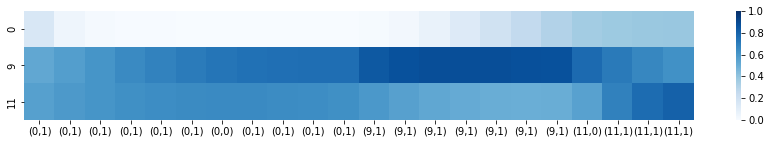

In [17]:
plt.figure(figsize=(15, 2))
dkt_fig = dkt.plot_output_layer(problem_seq=problem_seq, correct_seq=correct_seq)

figure = dkt_fig.get_figure()
#figure.savefig('dkt_id1.pdf', bbox_inches='tight')#, bbox_extra_artist=[lgd])

In [22]:
select_rows = melt.loc[(melt['user_id'] == 5)
                          & (melt['pedicted'] == 0.6097197)]
select_rows

,user_id,skill_id,pedicted
68534,5,89,0.60972


In [19]:
print(select_rows.pedicted.values.min(), select_rows.pedicted.values.max())

0.33234656 0.6097197


In [14]:
melt.to_csv('./data/lstm_data.csv')

In [25]:
skill = pd.read_csv('/home/fast/Desktop/Assessment_1/GKT/data/skill_builder_data.csv')
#skill.nunique()
skill

,Unnamed: 0


In [27]:
skill1 = skill[['skill_id', 'skill_name']]

In [18]:
skill['user_id'] = skill['user_id'].astype('category').cat.codes

In [19]:
skill.to_csv('./data/skill1_data.csv')

In [28]:
final = pd.merge(melt, skill1, on=['skill_id'])
#final[['User_id', 'Skill_id', 'Skill', 'Predicted']]

In [30]:
final.nunique()

user_id         770
skill_id        110
pedicted      79776
skill_name      110
dtype: int64

In [33]:
final.to_csv('./data/skill1_data.csv')

In [ ]:
import seaborn as sns
sns.displot(test1["Predicted"])

In [ ]:
def levels(row):  
    if row['Predicted'] > 0.2 and row['Predicted'] <= 0.5:
        return 'b'
    elif row['Predicted'] > 0.5 and row['Predicted'] <= 0.7:
        return 'i'
    elif row['Predicted'] > 0.7 and row['Predicted'] <= 1:
        return 'm'

In [ ]:
Final['Difficulty_level'] = Final.apply(lambda row: levels(row), axis=1)